In [1]:
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In [2]:
data=pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week5/Proyect/king_ country_ houses_aa.csv/king_ country_ houses_aa2.csv")

In [3]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.metrics import classification_report 

In [4]:
X=data.drop("price", axis=1)
y=data["price"]

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

<h2 style="color: #8d0421;">xgboost</h2>

In [7]:
import xgboost as xgb

In [8]:
xgbr=xgb.XGBRFRegressor()
xgbr.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [9]:
prediction_xgb=xgbr.predict(X_test)

In [10]:
r2_xgb=r2_score(y_test,prediction_xgb)
r2_xgb

0.7679773810532393

<h2 style="color: #8d0421;">Linear Regression</h2>

In [12]:
from sklearn.linear_model import LinearRegression 

In [13]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
predictions=model.predict(X_test)

In [15]:
r2_lin=r2_score(y_test,predictions)
r2_lin

0.6945727324117937

In [16]:
rmse_linnear=mean_squared_error(y_test, predictions, squared=False)
rmse_linnear

C:\Users\igara\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


209984.46436956455

<h2 style="color: #8d0421;">Decision Tree</h2>

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [20]:
predict_tree=tree.predict(X_test)

In [21]:
r2_tree=r2_score(y_test,predict_tree)
r2_tree

0.728446803480145

In [22]:
rmse_decision=mean_squared_error(y_test, predict_tree, squared=False)
rmse_decision

C:\Users\igara\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


197997.9624273856

<h2 style="color: #8d0421;">Lazy Regressor</h2>

In [24]:
#!pip install lazypredict

In [25]:
from lazypredict.Supervised import LazyRegressor

In [26]:
regressor=LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=regressor.fit(X_train,X_test,y_train,y_test)
best_models=models.head(10)

 21%|██▏       | 9/42 [00:09<00:47,  1.45s/it]  File "C:\Users\igara\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
100%|██████████| 42/42 [02:38<00:00,  2.11s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 16
[LightGBM] [Info] Start training from score 537640.173177


100%|██████████| 42/42 [02:38<00:00,  3.78s/it]


In [27]:
best_models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.87,0.87,135224.78,0.27
HistGradientBoostingRegressor,0.87,0.87,137320.12,0.76
XGBRegressor,0.86,0.86,142364.87,0.36
ExtraTreesRegressor,0.85,0.85,145588.42,5.56
RandomForestRegressor,0.85,0.85,145597.72,11.91
GradientBoostingRegressor,0.85,0.85,145812.76,3.04
BaggingRegressor,0.84,0.84,149983.24,1.39
KNeighborsRegressor,0.78,0.78,179337.11,0.19
DecisionTreeRegressor,0.73,0.73,197151.46,0.21


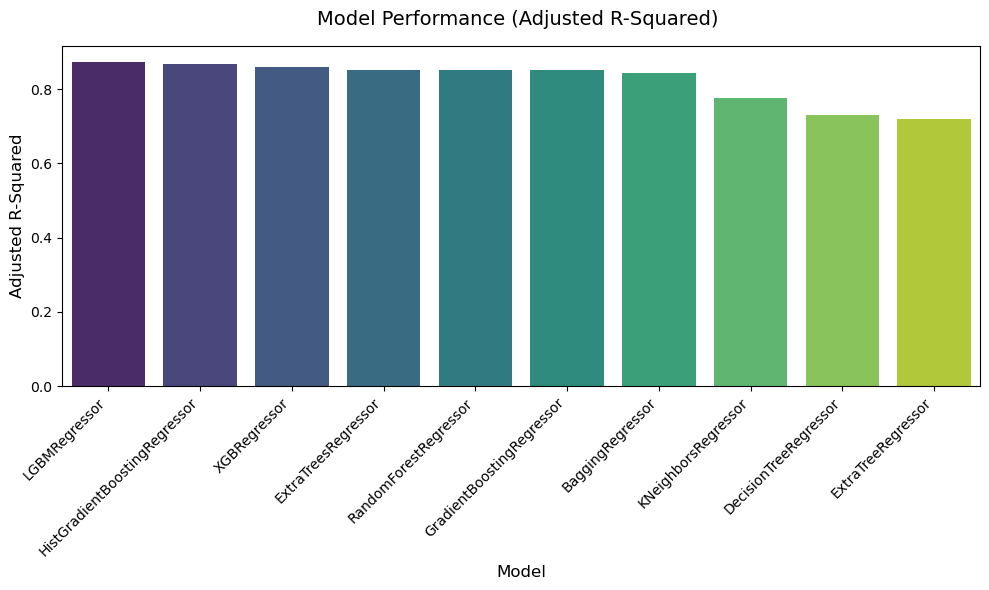

In [28]:
# Create the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(
    x="Model", 
    y="Adjusted R-Squared", 
    data=best_models, 
    palette="viridis"
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a title and axis labels
plt.title("Model Performance (Adjusted R-Squared) ", fontsize=14, pad=15)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Adjusted R-Squared", fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

<h2 style="color: #8d0421;">Random Forest</h2>

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
random_forest=RandomForestRegressor(
            n_estimators=300,
            min_samples_split=5,                                   
            min_samples_leaf=2,
            max_samples=0.8
)
random_forest.fit(X_train,y_train)

RandomForestRegressor(max_samples=0.8, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)

In [32]:
random_forest_pred=random_forest.predict(X_test)
r2_random_forest=r2_score(y_test,random_forest_pred)
r2_random_forest

0.8570858992396307

In [33]:
rmse_random_forest=mean_squared_error(y_test, random_forest_pred, squared=False)
rmse_random_forest

143638.48036979933

In [34]:
eval_random_forest_df=pd.DataFrame({"actual":y_test,"predicted":random_forest_pred})


In [35]:
eval_random_forest_df

,actual,predicted
735,365000.00,383346.58
2830,865000.00,873778.82
4106,1038000.00,1086341.63
16218,1490000.00,2080381.20
19964,711000.00,713595.63
...,...,...
12606,412000.00,373014.39
14393,760000.00,586812.36
6899,410500.00,335198.85
85,940000.00,949419.68


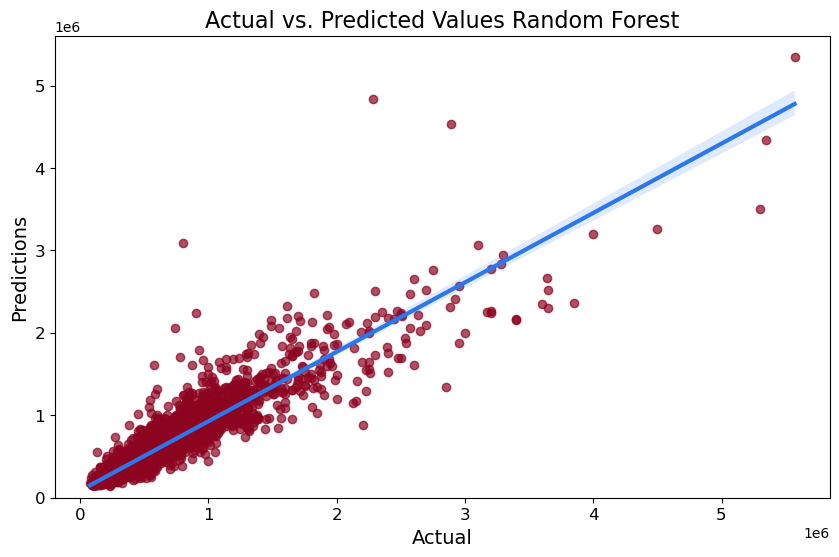

In [36]:
scatter_color = "#8d0421"
line_color = "#2d77ed"

plt.figure(figsize=(10, 6))

sns.regplot(x="actual", y="predicted", data=eval_random_forest_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title("Actual vs. Predicted Values Random Forest", fontsize=16)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The blue line in your scatter plot represents the perfect prediction line, also known as the line of equality. It indicates where the predicted values would lie if the model's predictions perfectly matched the actual values. In this case:

<h2 style="color: #8d0421;">XGB Regressor</h2>

In [39]:
from xgboost import XGBRegressor

In [40]:
model_x=XGBRegressor(
    learning_rate=0.05,  
    n_estimators=500,    
    max_depth=5,         
    subsample=0.8,       
    colsample_bytree=0.8,  
    random_state=42      
)
model_x.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
pred_x=model_x.predict(X_test)
r2_x=r2_score(y_test,pred_x)
r2_x

0.8817362791723978

In [42]:
eval_xgb_df=pd.DataFrame({"actual":y_test,"predicted":pred_x})

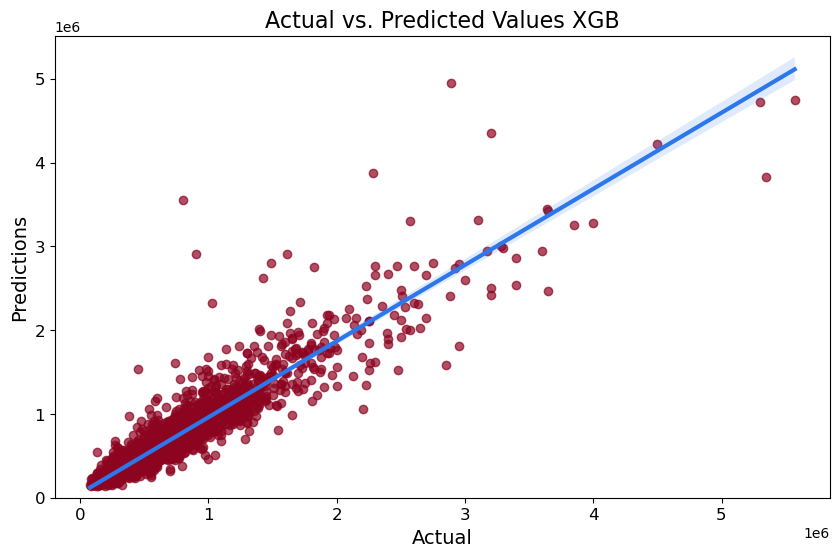

In [43]:
scatter_color = "#8d0421"
line_color = "#2d77ed"

plt.figure(figsize=(10, 6))

sns.regplot(x="actual", y="predicted", data=eval_xgb_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title("Actual vs. Predicted Values XGB", fontsize=16)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h2 style="color: #8d0421;">LGBM Regressor</h2>

In [45]:
from lightgbm import LGBMRegressor

In [46]:
model_lgbm=LGBMRegressor(learning_rate=0.05,
        n_estimators=500,
        max_depth=5,
        feature_fraction=.7
)
model_lgbm.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2003
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 16
[LightGBM] [Info] Start training from score 537640.173177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

LGBMRegressor(feature_fraction=0.7, learning_rate=0.05, max_depth=5,
              n_estimators=500)

In [47]:
pred_lgbm=model_lgbm.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


In [48]:
r2_lgbm=r2_score(y_test,pred_lgbm)
r2_lgbm

0.8839214505947415

In [49]:
eval_lgbm_df=pd.DataFrame({"actual":y_test,"predicted":pred_lgbm})

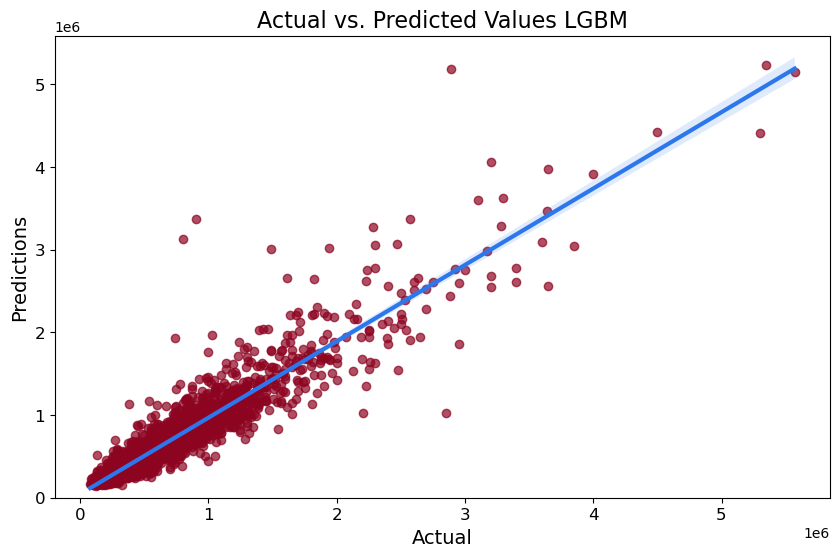

In [50]:
scatter_color = "#8d0421"
line_color = "#2d77ed"

plt.figure(figsize=(10, 6))

sns.regplot(x="actual", y="predicted", data=eval_lgbm_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title("Actual vs. Predicted Values LGBM", fontsize=16)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h2 style="color: #8d0421;">Random Prediction</h2>

In [52]:
min_values=data.drop("price",axis=1).min()
max_values=data.drop("price",axis=1).max()

In [53]:
#uniform porque mis datos son cantidades no enteras por eso no se usa randint
#genera automaticamente un valor por cada par por eso no especifico la posicion
random_values=np.random.uniform(min_values,max_values,size=(1,len(data.drop("price",axis=1).columns)))

In [54]:
names=data.drop("price",axis=1).head(0)
random_values_df=pd.DataFrame(random_values)

In [55]:
names.loc[0,:]=random_values
names

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,1.33,6.54,5071.08,897171.16,1.74,0.17,2.96,3.63,2.03,538.83,1927.38,1305.08,47.22,-122.11,4100.88,444469.15


<h4 style="color: #8d0421;">Random Forest Random</h4>

In [57]:
random_forest_pred_random=random_forest.predict(random_values)

In [58]:
print(f"The price prediction with LGBM Regressor for the random house is :{random_forest_pred_random}")

The price prediction with LGBM Regressor for the random house is :[774876.0662963]


<h4 style="color: #8d0421;">XGB Regressor Random</h4>

In [60]:
pred_x_random=model_x.predict(random_values)

In [61]:
print(f"The price prediction with LGBM Regressor for the random house is :{pred_x_random}")


The price prediction with LGBM Regressor for the random house is :[1267042.]


<h4 style="color: #8d0421;">LGBM Random Prediction</h4>

In [63]:
predict_lgbm_random=model_lgbm.predict(random_values)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


In [64]:
print(f"The price prediction with LGBM Regressor for the random house is :{predict_lgbm_random}")

The price prediction with LGBM Regressor for the random house is :[1867199.67119673]
